In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import os

In [ ]:
df = pd.read_csv("../data/processed/feature_engineered_data.csv")
df.shape

(6216, 119)

In [ ]:
X = df.drop(['price', 'price_per_sqft', 'log_price'], axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (4972, 116)
Testing set: (1244, 116)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f} ")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

R2 Score: 0.9360
MAE: 12.8665 Lakhs
RMSE: 20.1560 Lakhs
MAPE: 17.30%


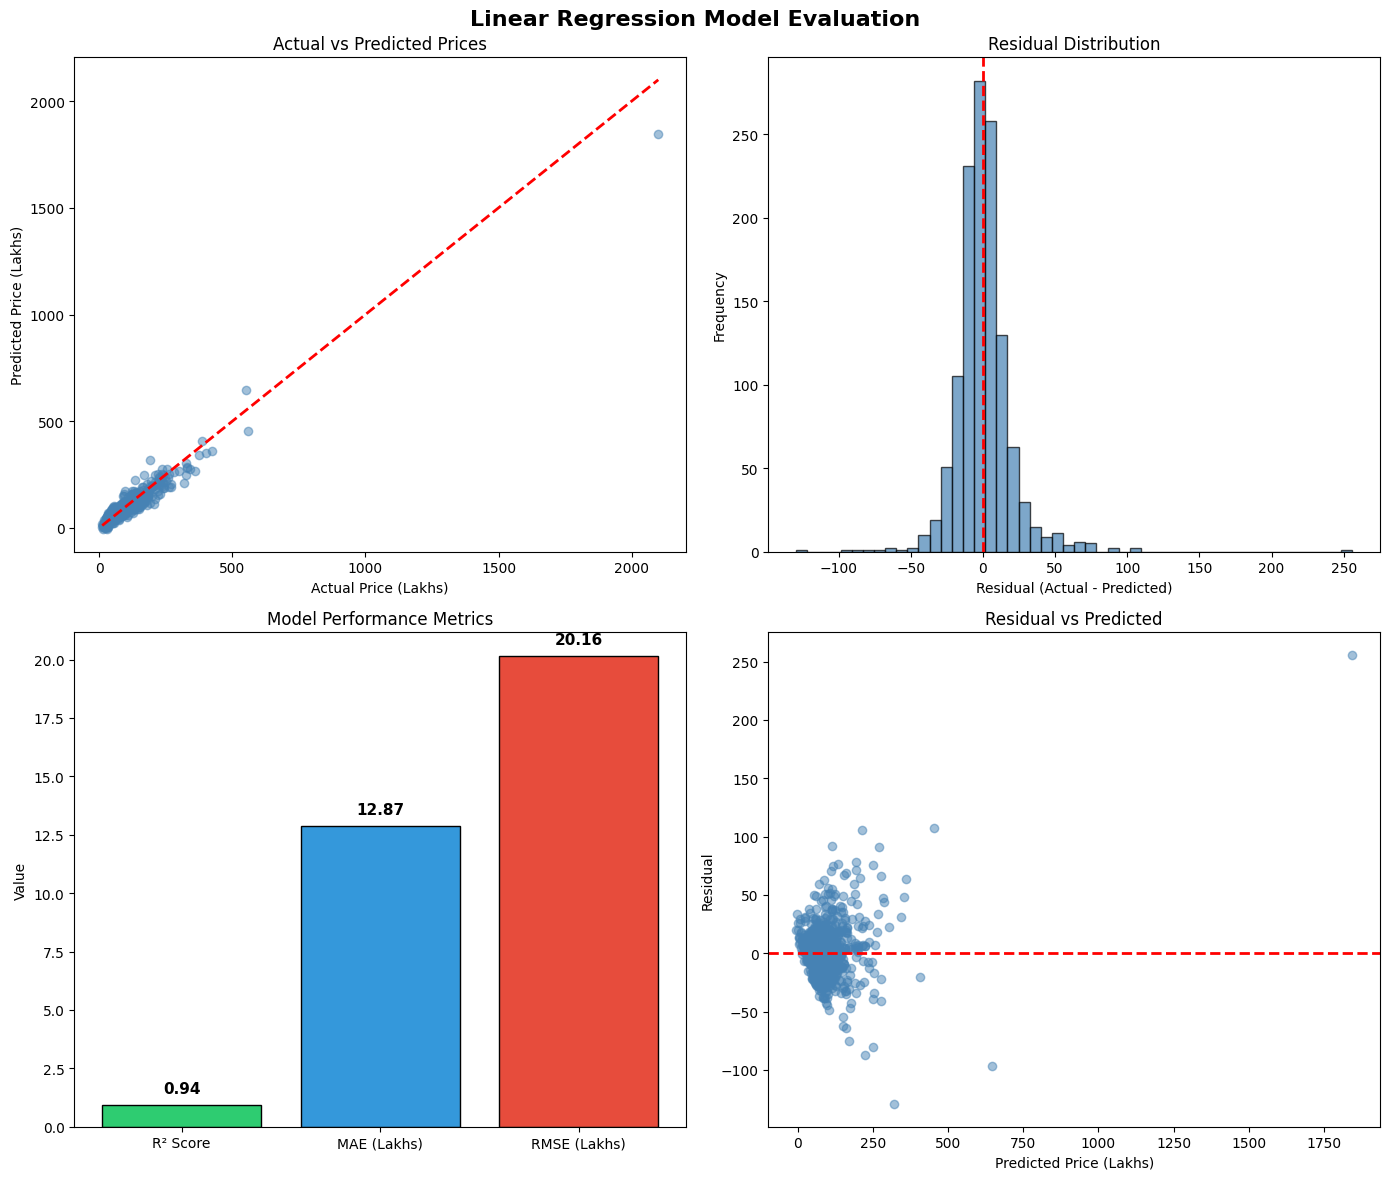

Graph saved to docs/images/linear_regression_results.png


In [ ]:
os.makedirs('../docs/images', exist_ok=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.5, color='steelblue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price (Lakhs)')
axes[0, 0].set_ylabel('Predicted Price (Lakhs)')
axes[0, 0].set_title('Actual vs Predicted Prices')

# 2. Residual Distribution
residuals = y_test - y_pred
axes[0, 1].hist(residuals, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Residual (Actual - Predicted)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residual Distribution')

# 3. Metrics Bar Chart
metrics = ['R² Score', 'MAE (Lakhs)', 'RMSE (Lakhs)']
values = [r2, mae, rmse]
colors = ['#2ecc71', '#3498db', '#e74c3c']
bars = axes[1, 0].bar(metrics, values, color=colors, edgecolor='black')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_title('Model Performance Metrics')
for bar, val in zip(bars, values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{val:.2f}', ha='center', fontsize=11, fontweight='bold')

# 4. Prediction Error Plot
axes[1, 1].scatter(y_pred, residuals, alpha=0.5, color='steelblue')
axes[1, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Price (Lakhs)')
axes[1, 1].set_ylabel('Residual')
axes[1, 1].set_title('Residual vs Predicted')

plt.suptitle('Linear Regression Model Evaluation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/images/linear_regression_results.png', dpi=150, bbox_inches='tight')
plt.show()
print("Graph saved to docs/images/linear_regression_results.png")

In [ ]:
os.makedirs('../models', exist_ok=True)
with open('../models/linear_regression.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
print("Model saved to models/linear_regression.pkl")

Model saved to models/linear_regression.pkl
